<a href="https://colab.research.google.com/github/DonRoboto/RedesNeuronales/blob/master/RedNeuronal_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regresión Logística

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

# para reproducibilidad
tf.random.set_seed(2020)

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

# silenciar TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.random.set_seed(2019)

Datos de iris

In [2]:
columns = ('largo sépalo', 'ancho sépalo', 'largo pétalo', 'ancho pétalo', 'clase')
df = pd.read_csv('https://raw.githubusercontent.com/DonRoboto/RedesNeuronales/master/data/iris.csv', names=columns)
pd.concat((df[1:5], df[50:55], df[100:105]))

,largo sépalo,ancho sépalo,largo pétalo,ancho pétalo,clase
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


El modelo de regresión logística que entrenaremos resolverá una tarea de clasificación binaria sobre este conjunto considerando únicamente como entrada el largo del peétalo y como salida las dos primeras clases. Grafiquemos la entrada contra la salida para visualizar su relación

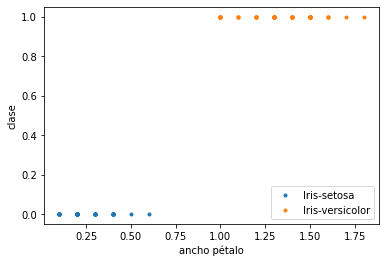

In [3]:
label2index = {'Iris-setosa': 0, 'Iris-versicolor': 1}
x_train = np.array(df.iloc[:, 3][:100])[..., np.newaxis]
y_true_train = [label2index[l] for l in df.iloc[:, -1][:100]]
y_true_train = np.array(y_true_train)[..., np.newaxis]
plt.plot(x_train[:50], y_true_train[:50], '.', label='Iris-setosa')
plt.plot(x_train[50:], y_true_train[50:], '.', label='Iris-versicolor')
plt.xlabel('ancho pétalo')
plt.ylabel('clase')
plt.legend(loc='lower right')
plt.show()

Tubería de Datos

In [4]:
batch_size = 16
ds = tf.data.Dataset.from_tensor_slices((x_train, y_true_train))
ds = ds.shuffle(len(df))
ds = ds.batch(batch_size)

for x, y_true in ds:
    print('x={} x.shape={}'.format(x.numpy().flatten(), x.shape))
    print('y={} y_true.shape={}'.format(y_true.numpy().flatten(), y_true.shape))
    break

x=[0.2 1.2 1.3 0.2 1.3 0.3 0.2 1.5 0.4 0.2 0.2 1.3 0.2 0.2 0.4 0.1] x.shape=(16, 1)
y=[0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0] y_true.shape=(16, 1)


##Definición del Modelo

In [0]:
class LogReg(Model):

  def __init__(self):
    super(LogReg, self).__init__()
    self.fc = Dense(1, activation=tf.nn.sigmoid)

  def call(self, x):
    return self.fc(x)

Función de Pérdida

In [0]:
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

Definición de Métricas

In [0]:
# historial de pérdidas
train_loss = tf.keras.metrics.BinaryCrossentropy()
# historial de exactitudes
train_acc = tf.keras.metrics.BinaryAccuracy()

Entrenamiento

In [10]:
model = LogReg()

epochs = 100

for epoch in range(epochs):
    
    for x, y_true in ds:
        
        with tf.GradientTape() as tape:
            y_pred = model(x)
            loss = loss_fn(y_true, y_pred)            
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(y_true, y_pred)
        train_acc(y_true, y_pred)
    
    loss = train_loss.result() * 100
    acc = train_acc.result() * 100
    train_loss.reset_states()
    train_acc.reset_states()

    print('E{:3d} loss={:6.2f}, acc={:6.2f}'.format(epoch, loss, acc))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

E  0 loss=115.50, acc= 50.00
E  1 loss= 98.29, acc= 28.00
E  2 loss= 87.25, acc=  6.00
E  3 loss= 80.08, acc=  0.00
E  4 loss= 74.58, acc= 19.00
E  5 loss= 70.24, acc= 50.00
E  6 loss= 66.63, acc= 50.00
E  7 loss= 63.38, acc= 50.00
E  8 loss= 60.62, acc= 50.00
E  9 loss= 58.12, acc= 54.00
E 10 loss= 55.89, acc= 56.00
E 11 loss= 53.76, acc= 75.00
E 12 loss= 51.79, acc= 84.00
E 13 loss= 49.91, acc= 91.00
E 14 loss= 48.16, acc= 91.00
E 15 loss= 46.56, acc= 92.00
E 16 loss= 45.00, acc= 97.00
E 17 loss= 43.5

Inferencia

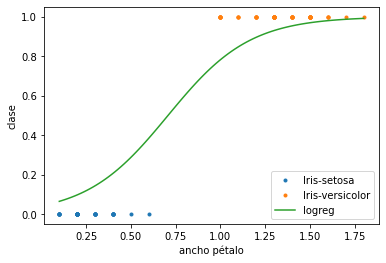

In [11]:
w, b = model.trainable_variables
w, b = w.numpy()[0][0], b.numpy()[0]
sigmoid = lambda x: (1 / (1 + np.exp(-x)))
x_model = np.linspace(x_train[:100].min(), x_train[:100].max(), 100)[..., np.newaxis]
y_model = sigmoid(x_model * w + b)
plt.plot(x_train[:50], y_true_train[:50], '.', label='Iris-setosa')
plt.plot(x_train[50:], y_true_train[50:], '.', label='Iris-versicolor')
plt.plot(x_model, y_model, label='logreg')
plt.xlabel('ancho pétalo')
plt.ylabel('clase')
plt.legend(loc='lower right')
plt.show()

